In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/creditcard.csv')


In [5]:
# Data Quality Check
print(df.isnull().sum())
print(df.duplicated().sum())

# Descriptive Statistics
print(df.describe())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
0
               Time            V1            V2            V3            V4  \
count  23234.000000  23234.000000  23234.000000  23234.000000  23234.000000   
mean   17882.360162     -0.240097      0.203073      0.728505      0.248942   
std    11278.254744      1.899190      1.536684      1.737013      1.443889   
min        0.000000    -30.552380    -40.978852    -31.103685     -5.172595   
25%     6338.250000     -0.956702     -0.371283      0.290159     -0.657895   
50%    19915.000000     -0.291577      0.197047      0.879851      0.214790   
75%    28754.500000      1.164827      0.847981      1.50919

In [4]:
# Handling missing values
df = df.dropna()  # or df.fillna(df.mean())

# Handling duplicates
df = df.drop_duplicates()

# Verify data quality again
print(df.isnull().sum())
print(df.duplicated().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
0


In [7]:
import pandas as pd

# Assuming df is your DataFrame

# Step 1: Handle missing values
df = df.fillna(df.mean())

# Step 2: Handle outliers in the 'Amount' column using IQR method
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Amount'] = df['Amount'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Verify the results
print(df.isnull().sum())
print(df.duplicated().sum())
print(df['Amount'].describe())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
0
count    23234.000000
mean        43.255459
std         50.614195
min          0.000000
25%          5.990000
50%         18.000000
75%         65.137500
max        153.858750
Name: Amount, dtype: float64


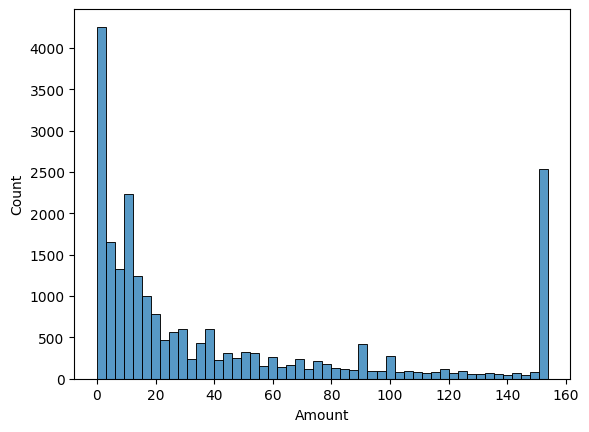

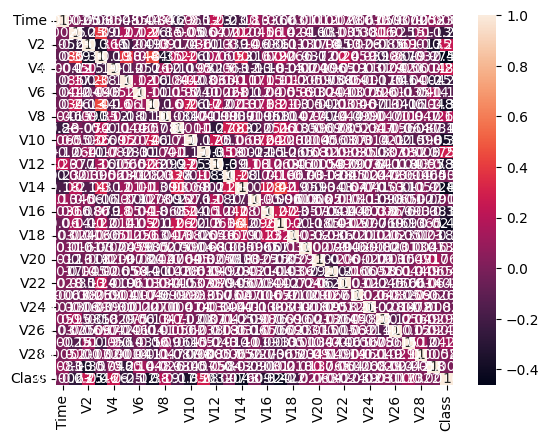

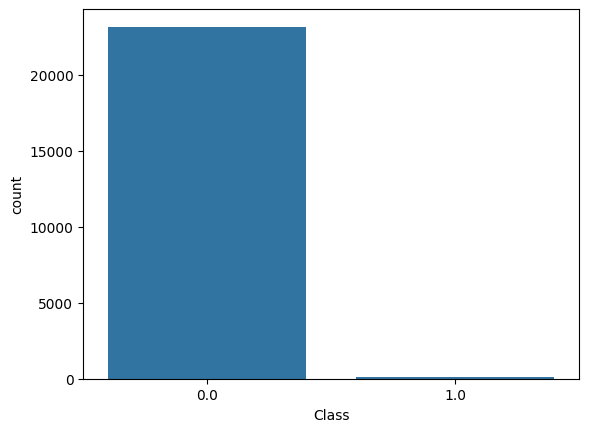

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Amount
sns.histplot(df['Amount'], bins=50)
plt.show()

# Correlation Matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Class Distribution
sns.countplot(x='Class', data=df)
plt.show()

In [9]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [10]:
from imblearn.over_sampling import SMOTE

X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


In [11]:
# Example of creating new features
df['Hour'] = df['Time'] // 3600 % 24


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, stratify=y_res, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Model Training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4630
         1.0       1.00      1.00      1.00      4629

    accuracy                           1.00      9259
   macro avg       1.00      1.00      1.00      9259
weighted avg       1.00      1.00      1.00      9259

ROC-AUC Score: 0.9999974104469569


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Example data (replace with your actual data)
# X_train, y_train = ...

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15]
}

# Initialize GridSearchCV with parallel processing
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_clf = grid_search.best_estimator_

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best estimator: ", best_clf)


Best parameters found:  {'max_depth': 15, 'n_estimators': 150}
Best estimator:  RandomForestClassifier(max_depth=15, n_estimators=150, random_state=42)


In [16]:
import joblib

# Save the model
joblib.dump(best_clf, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']